In [23]:
import torch
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import scienceplots as sp
import seaborn as sns

In [2]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [3]:
df = pd.read_csv('./latency.csv')
df['load_time'] *= 1E3
df = df.rename(columns={
    'load_time': 'Load Time',
    'inference_time': 'Inference Time',
    'swap_time': 'Swap Time',
    'model_name': 'Model',
})
df

,Model,Load Time,Inference Time,pruned_inference_time,Swap Time
0,VGG-11,718.0,74.380160,1,73.24
1,VGG-13,777.0,104.989527,1,74.24
2,VGG-16,1156.0,157.071100,1,146.51
3,VGG-19,1580.0,209.052128,1,127.62


In [4]:
df = pd.melt(df, id_vars=['Model'], value_vars=['Load Time', 'Inference Time', 'Swap Time'])
df

,Model,variable,value
0,VGG-11,Load Time,718.000000
1,VGG-13,Load Time,777.000000
2,VGG-16,Load Time,1156.000000
3,VGG-19,Load Time,1580.000000
4,VGG-11,Inference Time,74.380160
5,VGG-13,Inference Time,104.989527
6,VGG-16,Inference Time,157.071100
7,VGG-19,Inference Time,209.052128
8,VGG-11,Swap Time,73.240000
9,VGG-13,Swap Time,74.240000


In [5]:
x_axis_label = 'Model'
y_axis_label = 'Duration (ms)'

# # Get the current figure size
# current_figsize = plt.gcf().get_size_inches()

# # Set the desired height (adjust the height value to your preference)
# desired_height = 3  # Change this value to adjust the height

# # Update the figure size with the desired height while keeping the width unchanged
# plt.gcf().set_size_inches(current_figsize[0], desired_height)

with plt.style.context(['science', 'ieee']):
    ax = sns.barplot(data=df, x='Model', y='value', hue='variable')
    ax.legend(title='', loc='lower center', bbox_to_anchor=(0.5, 1.06), ncol=3, fancybox=True, shadow=True, borderaxespad=0)

    # Set custom axis labels
    ax.set_xlabel(x_axis_label)
    ax.set_ylabel(y_axis_label)

    # Despine the plot (remove right and top spines)
    sns.despine()

    # Remove tick labels from the top and right sides of the figure
    plt.tick_params(axis='both', which='both', top=False, right=False)

    # Manually add horizontal grid lines behind the bars
    y_ticks = ax.get_yticks()
    for y in y_ticks:
        ax.axhline(y, color='gray', linestyle='--', linewidth=0.5, zorder=0)

    # plt.show()
    plt.savefig('vgg_barplot.pgf', bbox_inches='tight')

### Plot Fine-tuning Up & Down

In [41]:
df_down = pd.read_csv('./data_viz/cifar100_vgg11_bn_finetuning_down.csv')
df_up = pd.read_csv('./data_viz/cifar100_vgg11_bn_orig_acc1.csv')

In [42]:
df_down = df_down.loc[df_down['Step'] <= 124]

In [43]:
offset = (df_down['Step']).max()

In [45]:
df_up['Step'] += offset

In [46]:
df_up

,Wall time,Step,Value
0,1.696891e+09,124,0.6957
1,1.696891e+09,125,0.7014
2,1.696891e+09,126,0.7035
3,1.696891e+09,127,0.7041
4,1.696891e+09,128,0.7040
...,...,...,...
345,1.696898e+09,469,0.7180
346,1.696898e+09,470,0.7175
347,1.696898e+09,471,0.7189
348,1.696898e+09,472,0.7169


In [65]:
df = pd.concat([df_down, df_up])
df = df.loc[df['Step'] < 300]

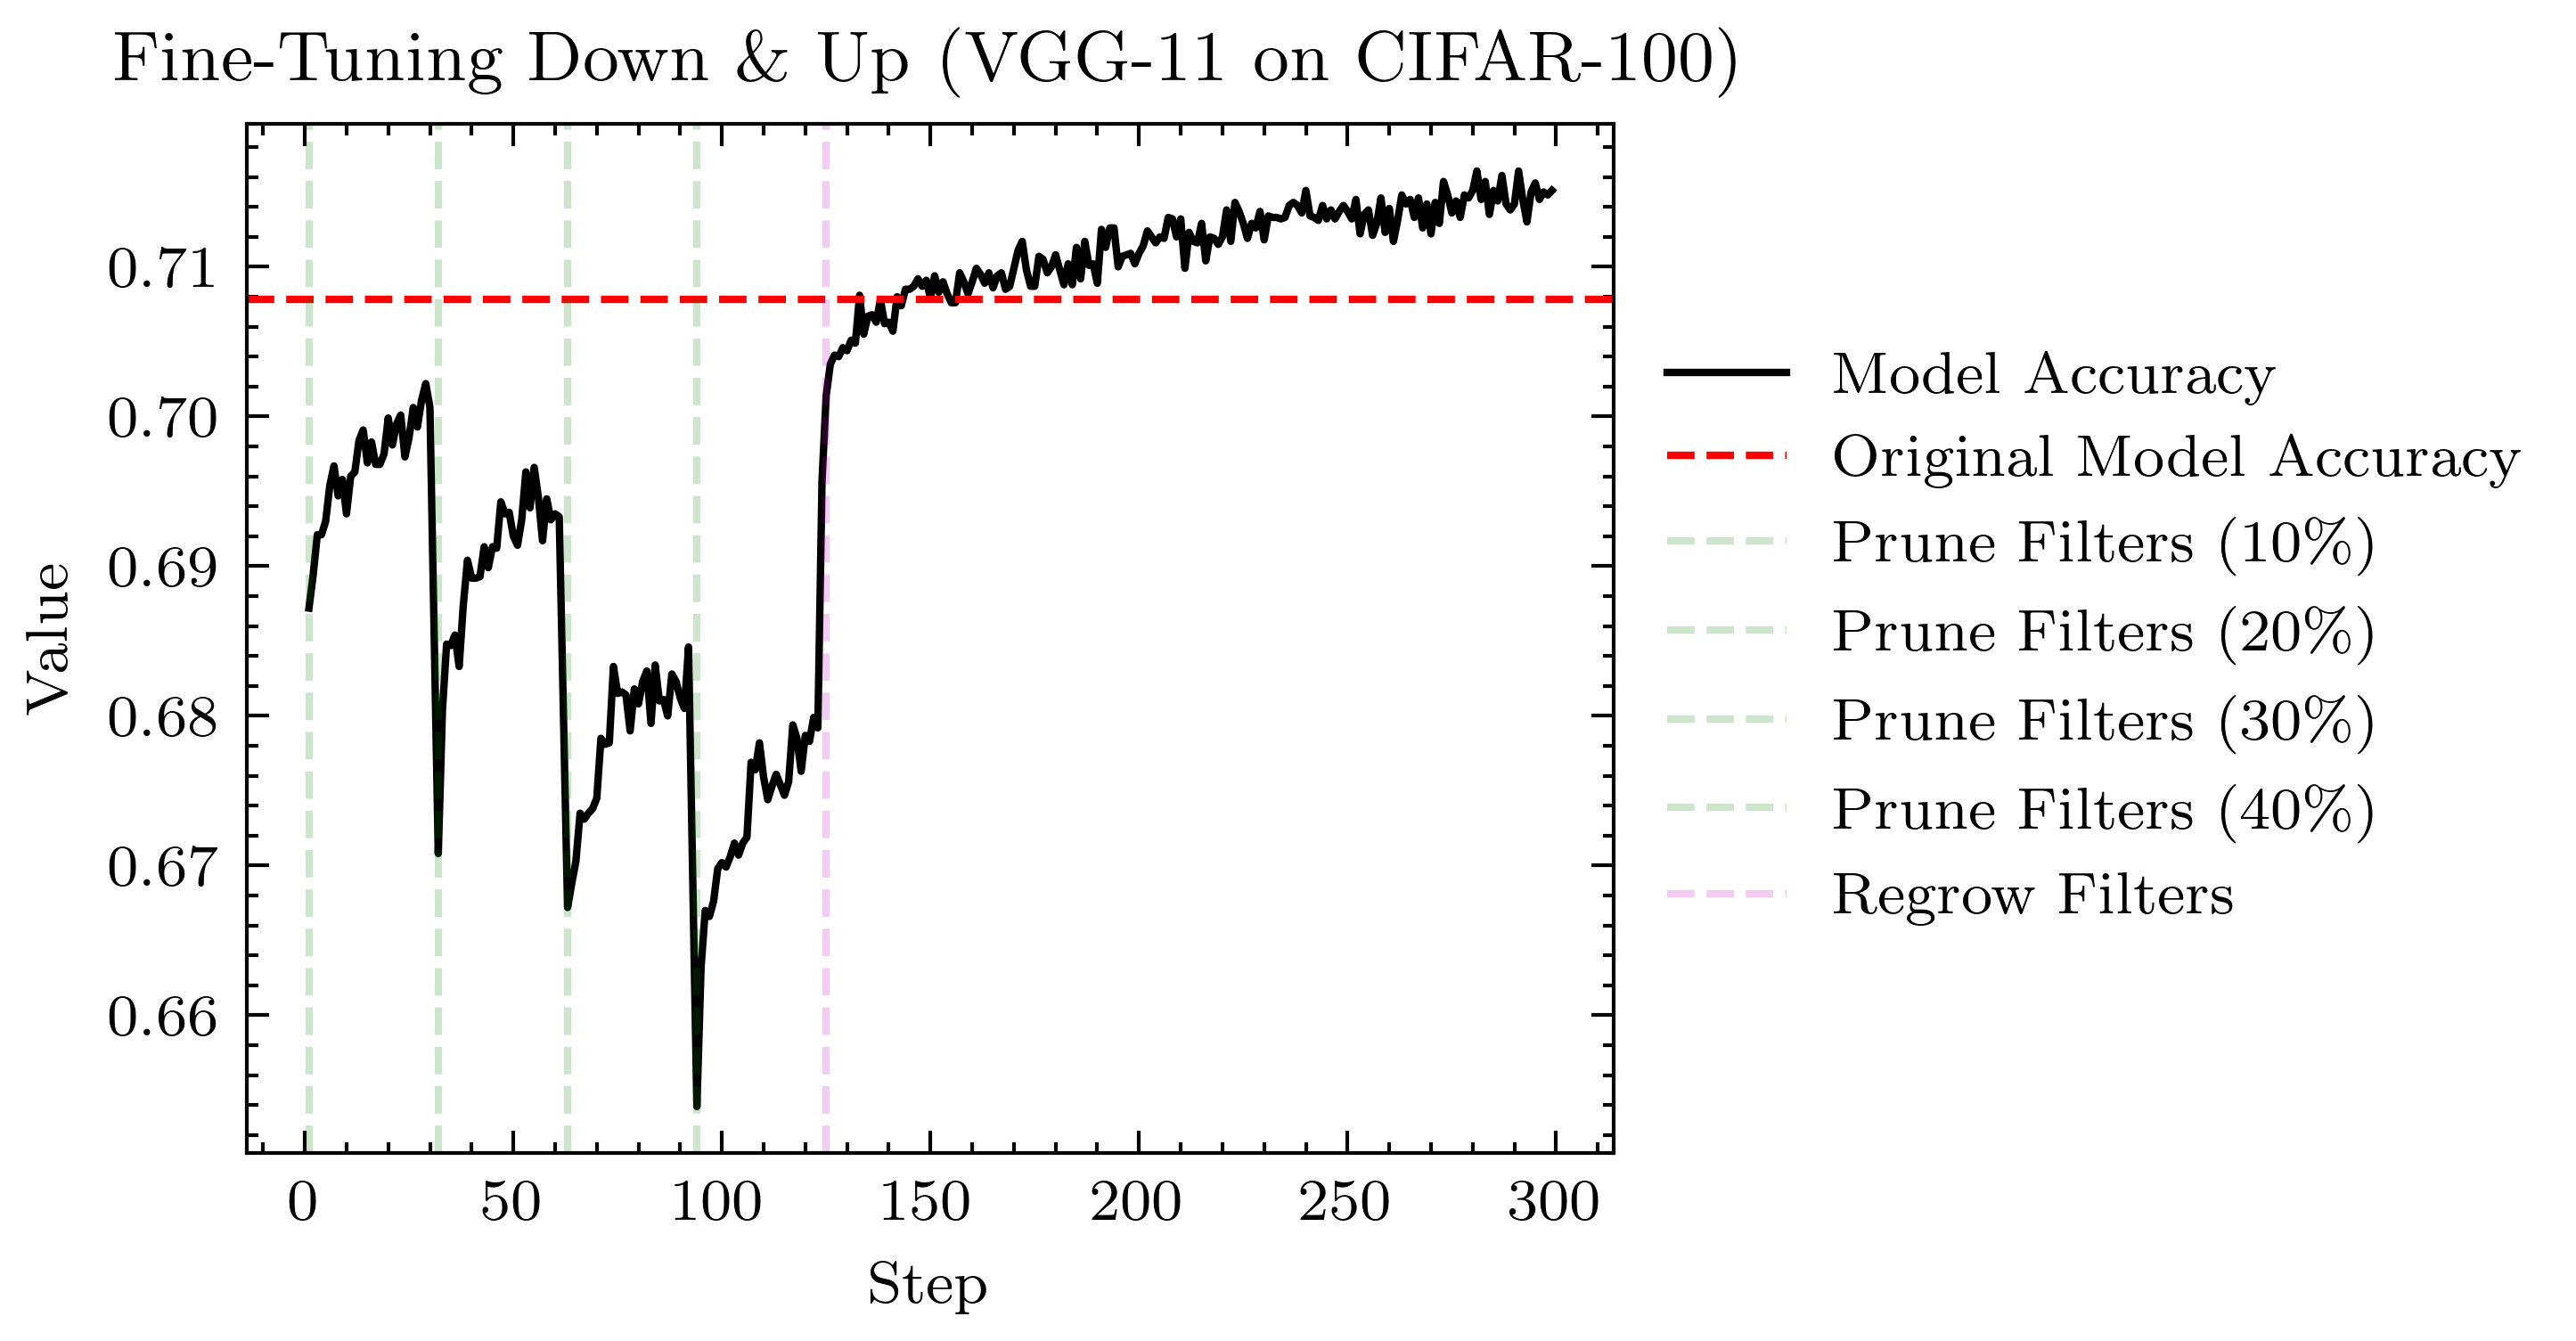

In [66]:
with plt.style.context(['science', 'ieee']):
    sns.lineplot(x='Step', y='Value', data=df, label='Model Accuracy')
    plt.axhline(y=0.7078, color='r', linestyle='--', label='Original Model Accuracy')
    
    plt.axvline(x=1, color='g', linestyle='--', label='Prune Filters (10\%)', alpha=0.2)
    plt.axvline(x=32, color='g', linestyle='--', label='Prune Filters (20\%)', alpha=0.2)
    plt.axvline(x=63, color='g', linestyle='--', label='Prune Filters (30\%)', alpha=0.2)
    plt.axvline(x=94, color='g', linestyle='--', label='Prune Filters (40\%)', alpha=0.2)
    plt.axvline(x=125, color='m', linestyle='--', label='Regrow Filters', alpha=0.2)
    
    plt.title("Fine-Tuning Down \& Up (VGG-11 on CIFAR-100)")
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the figure to the right
    plt.show()